# **Titanic_ML_End_to_End**

**Problem Statement**

Build a machine learning model to predict whether a passenger survived the Titanic disaster using passenger demographic and travel information. The goal is to preprocess the data, train multiple models, compare their performance, and select the best model based on evaluation metrics such as accuracy, precision, recall, and ROC-AUC.

**Data Cleaning**

In [80]:
import pandas as pd

In [81]:
df=pd.read_csv("/content/train.csv")

In [82]:
df=df.drop(["PassengerId","Name","Ticket"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


**Feature Engineering**

In [83]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [84]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode())

In [85]:
df["Sex"]=df["Sex"].map({"male":0,"female":1})

In [86]:
df["Sex"].value_counts(dropna=False)

,count
Sex,
0,577
1,314


In [87]:
df=pd.get_dummies(df,columns=["Embarked"],drop_first=True)

In [88]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [89]:
df.isnull().sum()
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Cabin,object
Embarked_Q,bool
Embarked_S,bool


In [90]:
'''df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
df=pd.get_dummies(df,columns=["Embarked"],drop_first=True)
df.columns'''

'df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])\ndf=pd.get_dummies(df,columns=["Embarked"],drop_first=True)\ndf.columns'

In [91]:
df=df.drop(["Cabin"],axis=1)

**Models Tried**

In [92]:
#Train Logestic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
y=df["Survived"]
df=df.drop(["Survived"],axis=1)
x=df
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
train_acc_lr=accuracy_score(y_train,lr.predict(x_train))
test_acc_lr=accuracy_score(y_test,lr.predict(x_test))
train_acc_lr,test_acc_lr

(0.800561797752809, 0.8100558659217877)

In [93]:
#Train Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_limited=DecisionTreeClassifier(max_depth=3,random_state=42)
dt_limited.fit(x_train,y_train)
train_acc_dt_1=accuracy_score(y_train,dt_limited.predict(x_train))
test_acc_dt_1=accuracy_score(y_test,dt_limited.predict(x_test))
train_acc_dt_1,test_acc_dt_1

(0.8342696629213483, 0.7988826815642458)

In [94]:
#Train Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
train_acc_rf = accuracy_score(y_train, rf.predict(x_train))
test_acc_rf=accuracy_score(y_test,rf.predict(x_test))
train_acc_rf,test_acc_rf

(0.9789325842696629, 0.7988826815642458)

**Evaluation Metrics**

In [95]:
y_prob = lr.predict_proba(x_test)
y_prob[:5]

array([[0.88866292, 0.11133708],
       [0.77838766, 0.22161234],
       [0.86562027, 0.13437973],
       [0.1142991 , 0.8857009 ],
       [0.26153537, 0.73846463]])

In [96]:
#Accuracy
#Logistic Regression
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
train_acc_lr=accuracy_score(y_train,lr.predict(x_train))
test_acc_lr=accuracy_score(y_test,lr.predict(x_test))
train_acc_lr,test_acc_lr


(0.800561797752809, 0.8100558659217877)

In [97]:
#Accuracy
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(x_train,y_train)
train_acc_dt=accuracy_score(y_train,dt.predict(x_train))
test_acc_dt=accuracy_score(y_test,dt.predict(x_test))
train_acc_dt,test_acc_dt

(0.8342696629213483, 0.7988826815642458)

In [98]:
#Accuracy
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
train_acc_rf=accuracy_score(y_train,rf.predict(x_train))
test_acc_rf=accuracy_score(y_test,rf.predict(x_test))
train_acc_rf,test_acc_rf

(0.9789325842696629, 0.7988826815642458)

In [108]:
import pandas as pd

results = pd.DataFrame({
    "Model":["Logistic Regression","Decision Tree","Random Forest"],
    "Train Accuracy":[train_acc_lr,train_acc_dt,train_acc_rf],
    "Test Accuracy":[test_acc_lr,test_acc_dt,test_acc_rf]
})
results


,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.800562,0.810056
1,Decision Tree,0.834270,0.798883
2,Random Forest,0.978933,0.798883


In [99]:
#Precision and Recall
y_pred=lr.predict(x_test)

In [100]:
from sklearn.metrics import precision_score,recall_score
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision,recall

(0.7857142857142857, 0.7432432432432432)

In [101]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,y_prob[:,1])
precision[:5],recall[:5]

(array([0.41340782, 0.41573034, 0.4180791 , 0.42045455, 0.41714286]),
 array([1.        , 1.        , 1.        , 1.        , 0.98648649]))

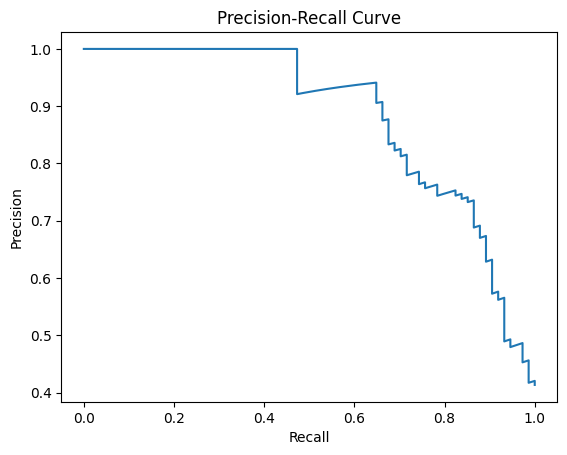

In [102]:
import matplotlib.pyplot as plt
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [103]:
#ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test,y_prob[:,1])
roc_auc

np.float64(0.883011583011583)

In [104]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_prob[:,1])
fpr[:5],tpr[:5],thresholds[:5]

(array([0.        , 0.        , 0.        , 0.02857143, 0.02857143]),
 array([0.        , 0.01351351, 0.47297297, 0.47297297, 0.60810811]),
 array([       inf, 0.95393347, 0.75778074, 0.74904032, 0.68420341]))

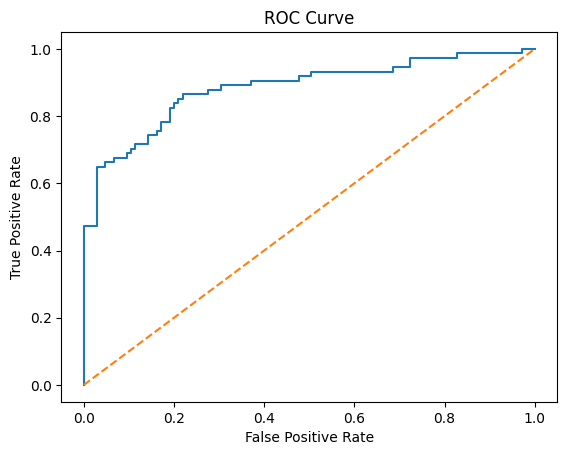

In [105]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [106]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[90, 15],
       [19, 55]])

**Final Model**

Final Model: Random Forest (tuned)
Why:

Better generalization than Decision Tree

Handles non-linearity

More stable than a single tree

**Key Learnings**

| Metric    | Best Use              |
| --------- | --------------------- |
| Accuracy  | Balanced data         |
| ROC-AUC   | General comparison    |
| PR Curve  | Imbalanced data       |
| Recall    | Avoid false negatives |
| Precision | Avoid false positives |


**Big-picture reflection (write answers, no code)**

1)What did you learn in the last 25 days overall?
Data preprocessing, model training, evaluation metrics, overfitting, and model tuning.
2)Which topic confused you the most initially but now makes sense?
thresholds,ROC,Recall and precision
(im confused with definations)
3)One mistake you kept repeating earlier and how you fixed it?
I was confused about thresholds, ROC curve, precision, and recall, but now I understand how they relate to model decisions
Which model do you now trust more and why?
I trust ROC-AUC more because it evaluates model performance across all thresholds and is more reliable than accuracy for imbalanced data.



**Final self-check**
1)Can you explain precision vs recall without formulas?
precision is out of all predicted positives how may or correct
Recall is out of all positives how were correctly predicted by model
2)Can you explain overfitting to a non-technical person?
Overfitting means the model learns the training data too well, including noise, so it performs poorly on new unseen data.
3)Can you explain why accuracy can lie?
Accuracy can be misleading when data is imbalanced or when the model predicts the majority class most of the time